In [1]:
#Import Statements
import deepchem as dc
from rdkit import Chem
from rdkit.Chem import Draw
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras import layers, losses

import pandas as pd

from matplotlib import pyplot as plt

import numpy as np

from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import (precision_recall_curve, average_precision_score, PrecisionRecallDisplay)
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_auc_score

Tox21 Assay List: <br>
<ol>
    <li> NR-AR </li>
    <li> NR-AR-LBD </li>
    <li> NR-AhR </li>
    <li> NR-Aromatase </li>
    <li> NR-ER </li>
    <li> NR-ER-LBD </li>
    <li> NR-PPAR-gamma </li>
    <li> SR-ARE </li>
    <li> SR-ATAD5 </li>
    <li> SR-HSE </li>
    <li> SR-MMP </li>
    <li> SR-p53 </li>
</ol>

In [2]:
assays = ['NR-AR', 'NR-AR-LBD','NR-AhR', 'NR-Aromatase', 'NR-ER', 'NR-ER-LBD', 'NR-PPAR-gamma',
         'SR-ARE', 'SR-ATAD5', 'SR-HSE', 'SR-MMP', 'SR-p53']

## SmilesToImage Featuriser - CNN Model

In [3]:
tasks_smiles, datasets_smiles, transformers_smiles = dc.molnet.load_tox21(
    featurizer = dc.feat.SmilesToImage(img_size=80, img_spec='std'),
    save_dir=r'C:\Users\ym20201\Documents\Datasets',
    data_dir=r'C:\Users\ym20201\Documents\Datasets')

splitter = dc.splits.RandomSplitter()

train_data_smiles, valid_data_smiles, test_data_smiles = datasets_smiles

In [4]:
# #SmilesToImage Model 5
# smiles2img_model = dc.models.CNN(
#     n_tasks = len(tasks_smiles), # Num of tasks, i.e. width of y
#     n_features=len(train_data_smiles.X[2]), # number of features, i.e. width of X
#     dims=1,
#     layer_filter=[1000,500,100], 
#     mode='classification',
#     weight_init_stddevs=0.02, 
#     bias_init_consts=1.0,
#     dropouts=0.5,
#     dense_layer_size=[500,200,200],
#     activation_fns=['relu'],
#     uncertainty=False,
#     pool_type='max',
#     residual=False,
#     padding='valid') 

In [15]:
#SmilesToImage Model 7
smiles2img_model = dc.models.CNN(
    n_tasks = len(tasks_smiles), # Num of tasks, i.e. width of y
    n_features=len(train_data_smiles.X[2]), # number of features, i.e. width of X
    dims=1,
    layer_filter=[500,500,200],
    mode='classification',
    weight_init_stddevs=0.02, 
    bias_init_consts=1.0,
    dropouts=0.5,
    dense_layer_size=[500,200,100],
    activation_fns=['relu'],
    uncertainty=False,
    pool_type='max',
    residual=False,
    padding='valid') 

In [16]:
smiles2img_model.fit(
    train_data_smiles,
    nb_epoch=20)

0.8724082310994467

In [17]:
smiles2img_pred = smiles2img_model.predict(test_data_smiles)

In [18]:
#Function for accessing y_true of each assay
def y_true(assay_num, test_data):
    y_true = []
    for i in range(len(test_data.y)):
        y_true.append(test_data.y[i][assay_num - 1])
        
    return y_true

def y_pred(assay_num, pred_data):
    y_pred = []
    for i in range(len(pred_data)):
        y_pred.append( pred_data[i][assay_num - 1][0])
#         y_pred = pred_data[i][assay_num - 1] #not sure which one
    
    return y_pred

In [20]:
#y_true of each assay
smiles2img_y_true_1 = y_true(1, test_data_smiles)
smiles2img_y_true_2 = y_true(2, test_data_smiles)
smiles2img_y_true_3 = y_true(3, test_data_smiles)
smiles2img_y_true_4 = y_true(4, test_data_smiles)
smiles2img_y_true_5 = y_true(5, test_data_smiles)
smiles2img_y_true_6 = y_true(6, test_data_smiles)
smiles2img_y_true_7 = y_true(7, test_data_smiles)
smiles2img_y_true_8 = y_true(8, test_data_smiles)
smiles2img_y_true_9 = y_true(9, test_data_smiles)
smiles2img_y_true_10 = y_true(10, test_data_smiles)
smiles2img_y_true_11 = y_true(11, test_data_smiles)
smiles2img_y_true_12 = y_true(12, test_data_smiles)

smiles2img_y_true = [smiles2img_y_true_1, smiles2img_y_true_2, smiles2img_y_true_3, smiles2img_y_true_4, smiles2img_y_true_5, 
        smiles2img_y_true_6, smiles2img_y_true_7, smiles2img_y_true_8, smiles2img_y_true_9, smiles2img_y_true_10,
        smiles2img_y_true_11, smiles2img_y_true_12]

In [21]:
#y_pred of each assay
smiles2img_y_pred_1 = y_pred(1, smiles2img_pred)
smiles2img_y_pred_2 = y_pred(2, smiles2img_pred)
smiles2img_y_pred_3 = y_pred(3, smiles2img_pred)
smiles2img_y_pred_4 = y_pred(4, smiles2img_pred)
smiles2img_y_pred_5 = y_pred(5, smiles2img_pred)
smiles2img_y_pred_6 = y_pred(6, smiles2img_pred)
smiles2img_y_pred_7 = y_pred(7, smiles2img_pred)
smiles2img_y_pred_8 = y_pred(8, smiles2img_pred)
smiles2img_y_pred_9 = y_pred(9, smiles2img_pred)
smiles2img_y_pred_10 = y_pred(10, smiles2img_pred)
smiles2img_y_pred_11 = y_pred(11, smiles2img_pred)
smiles2img_y_pred_12 = y_pred(12, smiles2img_pred)

In [22]:
def round_pred(y_pred):
    y_pred_new = []
    for i in range(len(y_pred)):
        if y_pred[i] < 0.5:
            new = 0
        else:
            new = 1
        y_pred_new.append(new)
    return y_pred_new

In [23]:
#Rounding predicted probabilities to binary values
smiles2img_y_pred_new_1 = round_pred(smiles2img_y_pred_1)
smiles2img_y_pred_new_2 = round_pred(smiles2img_y_pred_2)
smiles2img_y_pred_new_3 = round_pred(smiles2img_y_pred_3)
smiles2img_y_pred_new_4 = round_pred(smiles2img_y_pred_4)
smiles2img_y_pred_new_5 = round_pred(smiles2img_y_pred_5)
smiles2img_y_pred_new_6 = round_pred(smiles2img_y_pred_6)
smiles2img_y_pred_new_7= round_pred(smiles2img_y_pred_7)
smiles2img_y_pred_new_8 = round_pred(smiles2img_y_pred_8)
smiles2img_y_pred_new_9 = round_pred(smiles2img_y_pred_9)
smiles2img_y_pred_new_10 = round_pred(smiles2img_y_pred_10)
smiles2img_y_pred_new_11 = round_pred(smiles2img_y_pred_11)
smiles2img_y_pred_new_12 = round_pred(smiles2img_y_pred_12)

In [24]:
smiles2img_y_pred = [smiles2img_y_pred_1, smiles2img_y_pred_2, smiles2img_y_pred_3, smiles2img_y_pred_4, smiles2img_y_pred_5, 
             smiles2img_y_pred_6, smiles2img_y_pred_7, smiles2img_y_pred_8, smiles2img_y_pred_9, smiles2img_y_pred_10,
            smiles2img_y_pred_11, smiles2img_y_pred_12]

smiles2img_y_pred_new = [smiles2img_y_pred_new_1, smiles2img_y_pred_new_2, smiles2img_y_pred_new_3, smiles2img_y_pred_new_4, smiles2img_y_pred_new_5, 
             smiles2img_y_pred_new_6, smiles2img_y_pred_new_7, smiles2img_y_pred_new_8, smiles2img_y_pred_new_9, smiles2img_y_pred_new_10,
            smiles2img_y_pred_new_11, smiles2img_y_pred_new_12]

## ECFP Featuriser - MultitaskClassifier Model

In [25]:
#ECFP featuriser
tasks_ecfp, datasets_ecfp, transformers_ecfp = dc.molnet.load_tox21(
    featurizer=dc.feat.CircularFingerprint(),
    save_dir=r'C:\Users\ym20201\Documents\Datasets',
    data_dir=r'C:\Users\ym20201\Documents\Datasets')

splitter = dc.splits.RandomSplitter()

train_data_ecfp, valid_data_ecfp,test_data_ecfp = datasets_ecfp

In [26]:
# #ECFP Model 2
# ecfp_model = dc.models.MultitaskClassifier(
#     n_tasks = len(tasks_ecfp),
#     n_features = len(valid_data_ecfp.X[3]),
#     layer_sizes=[1000,500], # how many layers and how many units in each layer to have.
#     weight_init_stddevs=0.02, 
#     bias_init_consts=1.0,
#     weight_decay_penalty=0.0,
#     weight_decay_penalty_type='12',
#     dropouts=[0.5,0.0],
#     activation_fns=['relu'],  
#     n_classes=12,
#     learning_rate=0.01,
#     batch_size=100)

In [27]:
#ECFP Model 5
ecfp_model = dc.models.MultitaskClassifier(
    n_tasks = len(tasks_ecfp),
    n_features = len(valid_data_ecfp.X[3]),
    layer_sizes=[500,500,200], # how many layers and how many units in each layer to have.
    weight_init_stddevs=0.02, 
    bias_init_consts=1.0,
    weight_decay_penalty=0.0,
    weight_decay_penalty_type='12',
    dropouts=[0.8,0.5,0.0],
    activation_fns=['relu'],  
    n_classes=12,
    learning_rate=0.01,
    batch_size=100)

In [28]:
ecfp_model.fit(train_data_ecfp,
              nb_epoch=10)

0.8282603581746419

In [29]:
ecfp_pred = ecfp_model.predict(test_data_ecfp)

In [30]:
#y_true of each assay
ecfp_y_true_1 = y_true(1, test_data_ecfp)
ecfp_y_true_2 = y_true(2, test_data_ecfp)
ecfp_y_true_3 = y_true(3, test_data_ecfp)
ecfp_y_true_4 = y_true(4, test_data_ecfp)
ecfp_y_true_5 = y_true(5, test_data_ecfp)
ecfp_y_true_6 = y_true(6, test_data_ecfp)
ecfp_y_true_7 = y_true(7, test_data_ecfp)
ecfp_y_true_8 = y_true(8, test_data_ecfp)
ecfp_y_true_9 = y_true(9, test_data_ecfp)
ecfp_y_true_10 = y_true(10, test_data_ecfp)
ecfp_y_true_11 = y_true(11, test_data_ecfp)
ecfp_y_true_12 = y_true(12, test_data_ecfp)

ecfp_y_true = [ecfp_y_true_1, ecfp_y_true_2, ecfp_y_true_3, ecfp_y_true_4, ecfp_y_true_5, 
        ecfp_y_true_6, ecfp_y_true_7, ecfp_y_true_8, ecfp_y_true_9, ecfp_y_true_10,
        ecfp_y_true_11, ecfp_y_true_12]

In [31]:
#y_pred of each assay
ecfp_y_pred_1 = y_pred(1, ecfp_pred)
ecfp_y_pred_2 = y_pred(2, ecfp_pred)
ecfp_y_pred_3 = y_pred(3, ecfp_pred)
ecfp_y_pred_4 = y_pred(4, ecfp_pred)
ecfp_y_pred_5 = y_pred(5, ecfp_pred)
ecfp_y_pred_6 = y_pred(6, ecfp_pred)
ecfp_y_pred_7 = y_pred(7, ecfp_pred)
ecfp_y_pred_8 = y_pred(8, ecfp_pred)
ecfp_y_pred_9 = y_pred(9, ecfp_pred)
ecfp_y_pred_10 = y_pred(10, ecfp_pred)
ecfp_y_pred_11 = y_pred(11, ecfp_pred)
ecfp_y_pred_12 = y_pred(12, ecfp_pred)

In [32]:
#Rounding predicted probabilities to binary values
ecfp_y_pred_new_1 = round_pred(ecfp_y_pred_1)
ecfp_y_pred_new_2 = round_pred(ecfp_y_pred_2)
ecfp_y_pred_new_3 = round_pred(ecfp_y_pred_3)
ecfp_y_pred_new_4 = round_pred(ecfp_y_pred_4)
ecfp_y_pred_new_5 = round_pred(ecfp_y_pred_5)
ecfp_y_pred_new_6 = round_pred(ecfp_y_pred_6)
ecfp_y_pred_new_7= round_pred(ecfp_y_pred_7)
ecfp_y_pred_new_8 = round_pred(ecfp_y_pred_8)
ecfp_y_pred_new_9 = round_pred(ecfp_y_pred_9)
ecfp_y_pred_new_10 = round_pred(ecfp_y_pred_10)
ecfp_y_pred_new_11 = round_pred(ecfp_y_pred_11)
ecfp_y_pred_new_12 = round_pred(ecfp_y_pred_12)

In [33]:
ecfp_y_pred = [ecfp_y_pred_1, ecfp_y_pred_2, ecfp_y_pred_3, ecfp_y_pred_4, ecfp_y_pred_5, 
             ecfp_y_pred_6, ecfp_y_pred_7, ecfp_y_pred_8, ecfp_y_pred_9, ecfp_y_pred_10,
            ecfp_y_pred_11, ecfp_y_pred_12]

ecfp_y_pred_new = [ecfp_y_pred_new_1, ecfp_y_pred_new_2, ecfp_y_pred_new_3, ecfp_y_pred_new_4, ecfp_y_pred_new_5, 
             ecfp_y_pred_new_6, ecfp_y_pred_new_7, ecfp_y_pred_new_8, ecfp_y_pred_new_9, ecfp_y_pred_new_10,
            ecfp_y_pred_new_11, ecfp_y_pred_new_12]

## ConvMol Featuriser - GraphConv Model

In [34]:
#GraphConv featuriser
tasks_convmol, datasets_convmol, transformers_convmol = dc.molnet.load_tox21(
    featurizer = dc.feat.ConvMolFeaturizer(),
    save_dir=r'C:\Users\ym20201\Documents\Datasets',
    data_dir=r'C:\Users\ym20201\Documents\Datasets')

splitter = dc.splits.RandomSplitter()

train_data_convmol, valid_data_convmol,test_data_convmol = datasets_convmol

In [35]:
#Model 6
convmol_model = dc.models.GraphConvModel(
    n_tasks = len(tasks_convmol),
    graph_conv_layers=[32,32,32],
    dense_layer_size=128,
    dropout=0.0,
    mode='classification',
    number_atom_features=75,#default value
    batch_normalize=True,
    uncertainty=False,
    n_classes=12,
    learning_rate=0.01,
    batch_size=100)

In [36]:
convmol_model.fit(
    train_data_convmol,
    nb_epoch=10)

C:\Users\ym20201\Anaconda3\envs\tdaf-tf2p7\lib\site-packages\tensorflow\python\framework\indexed_slices.py:450: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model/graph_pool_2/Reshape_14:0", shape=(464,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model/graph_pool_2/Reshape_13:0", shape=(464, 32), dtype=float32), dense_shape=Tensor("gradient_tape/private__graph_conv_keras_model/graph_pool_2/Cast_4:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
C:\Users\ym20201\Anaconda3\envs\tdaf-tf2p7\lib\site-packages\tensorflow\python\framework\indexed_slices.py:450: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model/graph_pool_2/Reshape_17:0", shape=(1692,), dtype=int32), values=Tensor("gradient_tape/private__gr

C:\Users\ym20201\Anaconda3\envs\tdaf-tf2p7\lib\site-packages\tensorflow\python\framework\indexed_slices.py:450: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model/graph_pool_1/Reshape_14:0", shape=(464,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model/graph_pool_1/Reshape_13:0", shape=(464, 32), dtype=float32), dense_shape=Tensor("gradient_tape/private__graph_conv_keras_model/graph_pool_1/Cast_4:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
C:\Users\ym20201\Anaconda3\envs\tdaf-tf2p7\lib\site-packages\tensorflow\python\framework\indexed_slices.py:450: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model/graph_pool_1/Reshape_17:0", shape=(1692,), dtype=int32), values=Tensor("gradient_tape/private__gr

C:\Users\ym20201\Anaconda3\envs\tdaf-tf2p7\lib\site-packages\tensorflow\python\framework\indexed_slices.py:450: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model/graph_pool/Reshape_14:0", shape=(464,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model/graph_pool/Reshape_13:0", shape=(464, 32), dtype=float32), dense_shape=Tensor("gradient_tape/private__graph_conv_keras_model/graph_pool/Cast_4:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
C:\Users\ym20201\Anaconda3\envs\tdaf-tf2p7\lib\site-packages\tensorflow\python\framework\indexed_slices.py:450: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model/graph_pool/Reshape_17:0", shape=(1692,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv

C:\Users\ym20201\Anaconda3\envs\tdaf-tf2p7\lib\site-packages\tensorflow\python\framework\indexed_slices.py:450: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model/graph_pool/Reshape_14:0", shape=(424,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model/graph_pool/Reshape_13:0", shape=(424, 32), dtype=float32), dense_shape=Tensor("gradient_tape/private__graph_conv_keras_model/graph_pool/Cast_4:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
C:\Users\ym20201\Anaconda3\envs\tdaf-tf2p7\lib\site-packages\tensorflow\python\framework\indexed_slices.py:450: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model/graph_pool/Reshape_17:0", shape=(1608,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv

C:\Users\ym20201\Anaconda3\envs\tdaf-tf2p7\lib\site-packages\tensorflow\python\framework\indexed_slices.py:450: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model/graph_conv_1/Reshape_11:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model/graph_conv_1/Reshape_10:0", shape=(None, 32), dtype=float32), dense_shape=Tensor("gradient_tape/private__graph_conv_keras_model/graph_conv_1/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
C:\Users\ym20201\Anaconda3\envs\tdaf-tf2p7\lib\site-packages\tensorflow\python\framework\indexed_slices.py:450: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model/graph_conv_1/Reshape_13:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/private__gr

C:\Users\ym20201\Anaconda3\envs\tdaf-tf2p7\lib\site-packages\tensorflow\python\framework\indexed_slices.py:450: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model/graph_pool/Reshape_26:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model/graph_pool/Reshape_25:0", shape=(None, 32), dtype=float32), dense_shape=Tensor("gradient_tape/private__graph_conv_keras_model/graph_pool/Cast_8:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
C:\Users\ym20201\Anaconda3\envs\tdaf-tf2p7\lib\site-packages\tensorflow\python\framework\indexed_slices.py:450: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model/graph_pool/Reshape_29:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/private__graph_co

C:\Users\ym20201\Anaconda3\envs\tdaf-tf2p7\lib\site-packages\tensorflow\python\framework\indexed_slices.py:450: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model/graph_pool_2/Reshape_32:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model/graph_pool_2/Reshape_31:0", shape=(None, 32), dtype=float32), dense_shape=Tensor("gradient_tape/private__graph_conv_keras_model/graph_pool_2/Cast_10:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
C:\Users\ym20201\Anaconda3\envs\tdaf-tf2p7\lib\site-packages\tensorflow\python\framework\indexed_slices.py:450: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model/graph_pool_2/Reshape_35:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/private_

0.8838503519694011

In [37]:
convmol_pred = convmol_model.predict(test_data_convmol)

In [38]:
#y_true of each assay
convmol_y_true_1 = y_true(1, test_data_convmol)
convmol_y_true_2 = y_true(2, test_data_convmol)
convmol_y_true_3 = y_true(3, test_data_convmol)
convmol_y_true_4 = y_true(4, test_data_convmol)
convmol_y_true_5 = y_true(5, test_data_convmol)
convmol_y_true_6 = y_true(6, test_data_convmol)
convmol_y_true_7 = y_true(7, test_data_convmol)
convmol_y_true_8 = y_true(8, test_data_convmol)
convmol_y_true_9 = y_true(9, test_data_convmol)
convmol_y_true_10 = y_true(10, test_data_convmol)
convmol_y_true_11 = y_true(11, test_data_convmol)
convmol_y_true_12 = y_true(12, test_data_convmol)

convmol_y_true = [convmol_y_true_1, convmol_y_true_2, convmol_y_true_3, convmol_y_true_4, convmol_y_true_5, 
        convmol_y_true_6, convmol_y_true_7, convmol_y_true_8, convmol_y_true_9, convmol_y_true_10,
        convmol_y_true_11, convmol_y_true_12]

In [39]:
#y_pred of each assay
convmol_y_pred_1 = y_pred(1, convmol_pred)
convmol_y_pred_2 = y_pred(2, convmol_pred)
convmol_y_pred_3 = y_pred(3, convmol_pred)
convmol_y_pred_4 = y_pred(4, convmol_pred)
convmol_y_pred_5 = y_pred(5, convmol_pred)
convmol_y_pred_6 = y_pred(6, convmol_pred)
convmol_y_pred_7 = y_pred(7, convmol_pred)
convmol_y_pred_8 = y_pred(8, convmol_pred)
convmol_y_pred_9 = y_pred(9, convmol_pred)
convmol_y_pred_10 = y_pred(10, convmol_pred)
convmol_y_pred_11 = y_pred(11, convmol_pred)
convmol_y_pred_12 = y_pred(12, convmol_pred)

In [40]:
#Rounding predicted probabilities to binary values
convmol_y_pred_new_1 = round_pred(convmol_y_pred_1)
convmol_y_pred_new_2 = round_pred(convmol_y_pred_2)
convmol_y_pred_new_3 = round_pred(convmol_y_pred_3)
convmol_y_pred_new_4 = round_pred(convmol_y_pred_4)
convmol_y_pred_new_5 = round_pred(convmol_y_pred_5)
convmol_y_pred_new_6 = round_pred(convmol_y_pred_6)
convmol_y_pred_new_7= round_pred(convmol_y_pred_7)
convmol_y_pred_new_8 = round_pred(convmol_y_pred_8)
convmol_y_pred_new_9 = round_pred(convmol_y_pred_9)
convmol_y_pred_new_10 = round_pred(convmol_y_pred_10)
convmol_y_pred_new_11 = round_pred(convmol_y_pred_11)
convmol_y_pred_new_12 = round_pred(convmol_y_pred_12)

In [41]:
convmol_y_pred = [convmol_y_pred_1, convmol_y_pred_2, convmol_y_pred_3, convmol_y_pred_4, convmol_y_pred_5, 
             convmol_y_pred_6, convmol_y_pred_7, convmol_y_pred_8, convmol_y_pred_9, convmol_y_pred_10,
            convmol_y_pred_11, convmol_y_pred_12]

convmol_y_pred_new = [convmol_y_pred_new_1, convmol_y_pred_new_2, convmol_y_pred_new_3, convmol_y_pred_new_4, convmol_y_pred_new_5, 
             convmol_y_pred_new_6, convmol_y_pred_new_7, convmol_y_pred_new_8, convmol_y_pred_new_9, convmol_y_pred_new_10,
            convmol_y_pred_new_11, convmol_y_pred_new_12]

## Balanced Accuracy Score

In [44]:
def balanced_accuracy(y_true, y_pred):
    balanced_acc = []
    for i in range(len(y_true)):
        b_acc = balanced_accuracy_score(y_true[i], y_pred[i])
        balanced_acc.append(b_acc)
    return balanced_acc

In [45]:
smiles2img_balanced_acc = balanced_accuracy(smiles2img_y_true, smiles2img_y_pred_new)
ecfp_balanced_acc = balanced_accuracy(ecfp_y_true, ecfp_y_pred_new)
convmol_balanced_acc = balanced_accuracy(convmol_y_true, convmol_y_pred_new)

In [46]:
smiles2img_balanced_acc

[0.3682999181669394,
 0.37262532981530344,
 0.4765903674200618,
 0.5181913438309516,
 0.4514124293785311,
 0.42454304954304956,
 0.43614718614718617,
 0.46897345384486083,
 0.44323894101876676,
 0.5361207323107373,
 0.4870848424135008,
 0.44801482160288464]

In [59]:
ecfp_balanced_acc

[0.285679338519497,
 0.25514275885792914,
 0.37075898466951496,
 0.31409682727561417,
 0.4267507002801121,
 0.37920489296636084,
 0.43402529229300885,
 0.4396345498040414,
 0.3304886414074164,
 0.4725887005975923,
 0.38372093023255816,
 0.39091760299625467]

In [60]:
convmol_balanced_acc

[0.29553794216938206,
 0.36408668730650157,
 0.30001256597134957,
 0.4144172753255002,
 0.45434173669467787,
 0.3875054608999563,
 0.2940825578620854,
 0.4461749885478699,
 0.4234757696808296,
 0.35745835618811167,
 0.3551356589147287,
 0.40675717852684146]

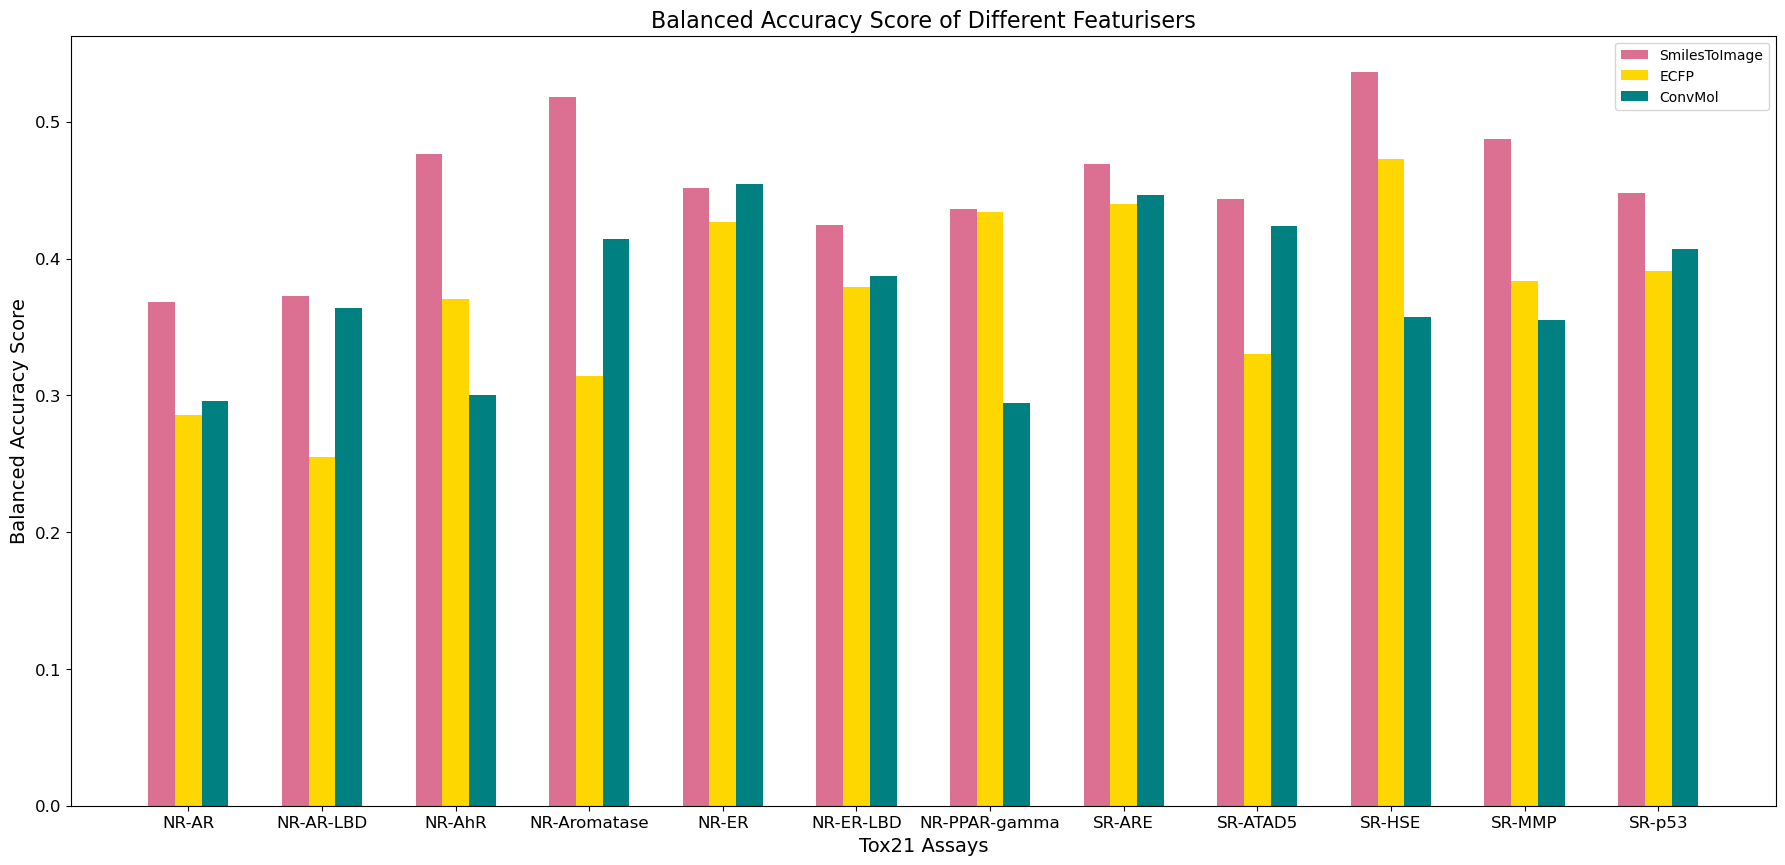

In [61]:
#Grouped bar plot
fig,ax = plt.subplots(figsize=(22,10))

width = 0.2

x=np.arange(12)
plt.bar(x-0.2, smiles2img_balanced_acc, width, label='SmilesToImage', color='palevioletred')
plt.bar(x, ecfp_balanced_acc, width, label='ECFP', color='gold')
plt.bar(x+0.2, convmol_balanced_acc, width, label='ConvMol', color='teal')

plt.title('Balanced Accuracy Score of Different Featurisers', fontsize=16)
plt.ylabel('Balanced Accuracy Score', fontsize=14)
plt.xlabel('Tox21 Assays', fontsize=14)
# plt.bar_label(ax.containers[0], fmt='%.3f', fontsize=12)
# plt.bar_label(ax.containers[1], fmt='%.3f', fontsize=12)
# plt.bar_label(ax.containers[2], fmt='%.3f', fontsize=12)
plt.xticks(x, assays, fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.savefig('Overall BA-nolabel.png')

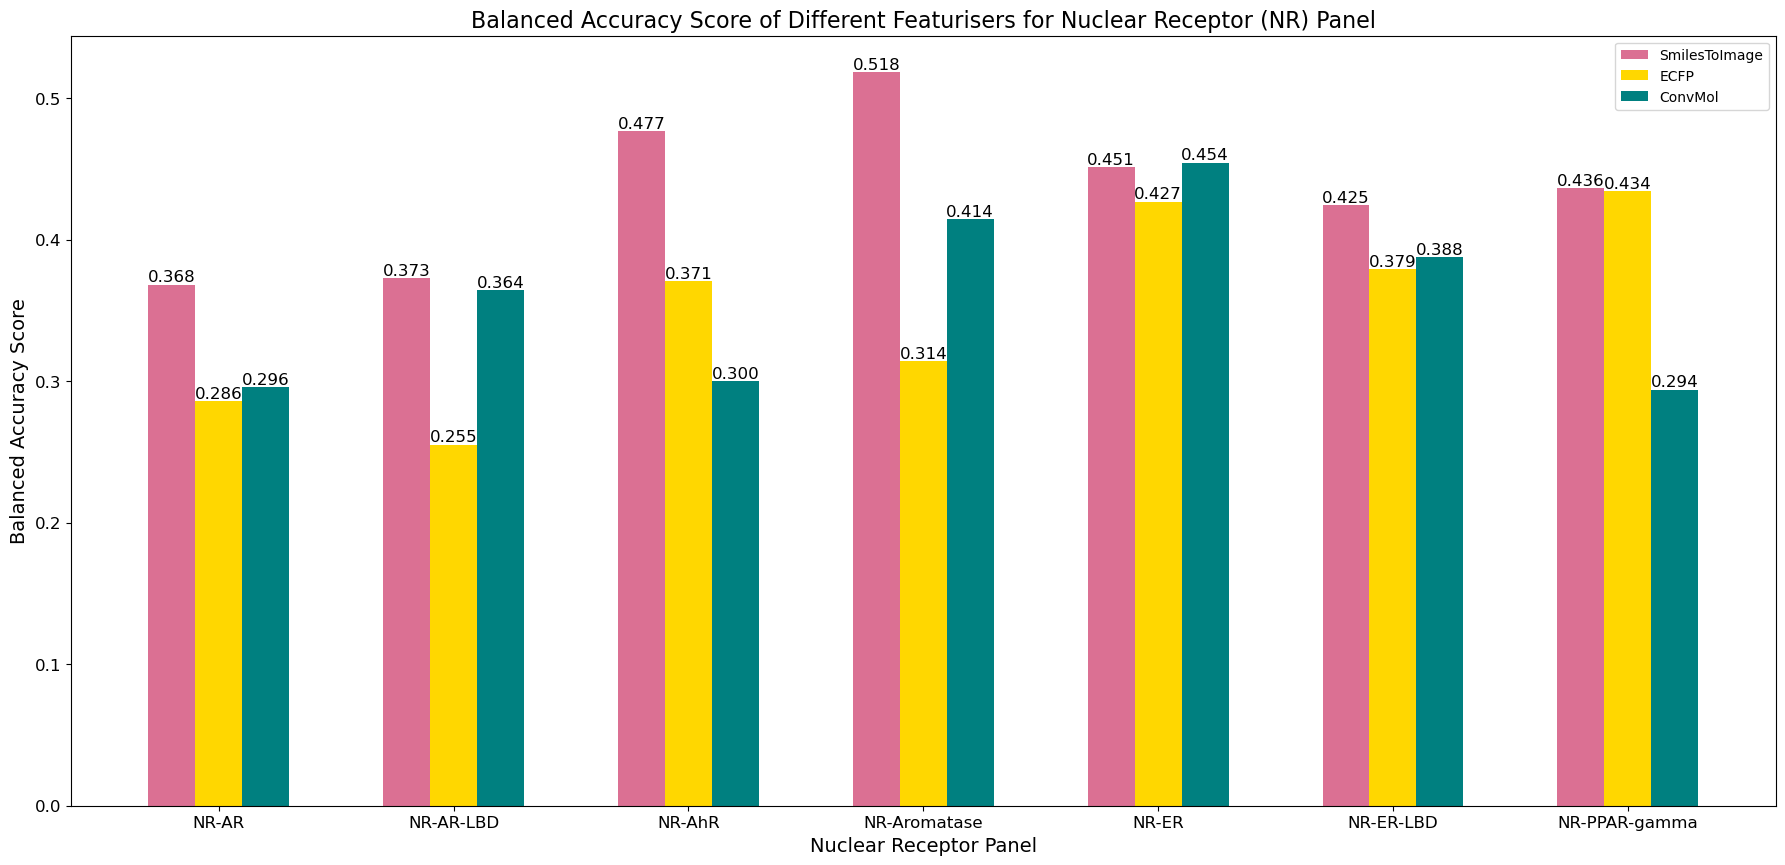

In [56]:
#Grouped bar plot
fig,ax = plt.subplots(figsize=(22,10))

width = 0.2

x=np.arange(7)

# for i in range(7):

plt.bar(x-0.2, smiles2img_balanced_acc[0:7], width, label='SmilesToImage', color='palevioletred')
plt.bar(x, ecfp_balanced_acc[0:7], width, label='ECFP', color='gold')
plt.bar(x+0.2, convmol_balanced_acc[0:7], width, label='ConvMol', color='teal')

plt.title('Balanced Accuracy Score of Different Featurisers for Nuclear Receptor (NR) Panel', fontsize=16)
plt.ylabel('Balanced Accuracy Score', fontsize=14)
plt.xlabel('Nuclear Receptor Panel', fontsize=14)
plt.bar_label(ax.containers[0], fmt='%.3f', fontsize=12)
plt.bar_label(ax.containers[1], fmt='%.3f', fontsize=12)
plt.bar_label(ax.containers[2], fmt='%.3f', fontsize=12)
plt.xticks(x, assays[0:7],fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.savefig('Overall BA-NR.png')

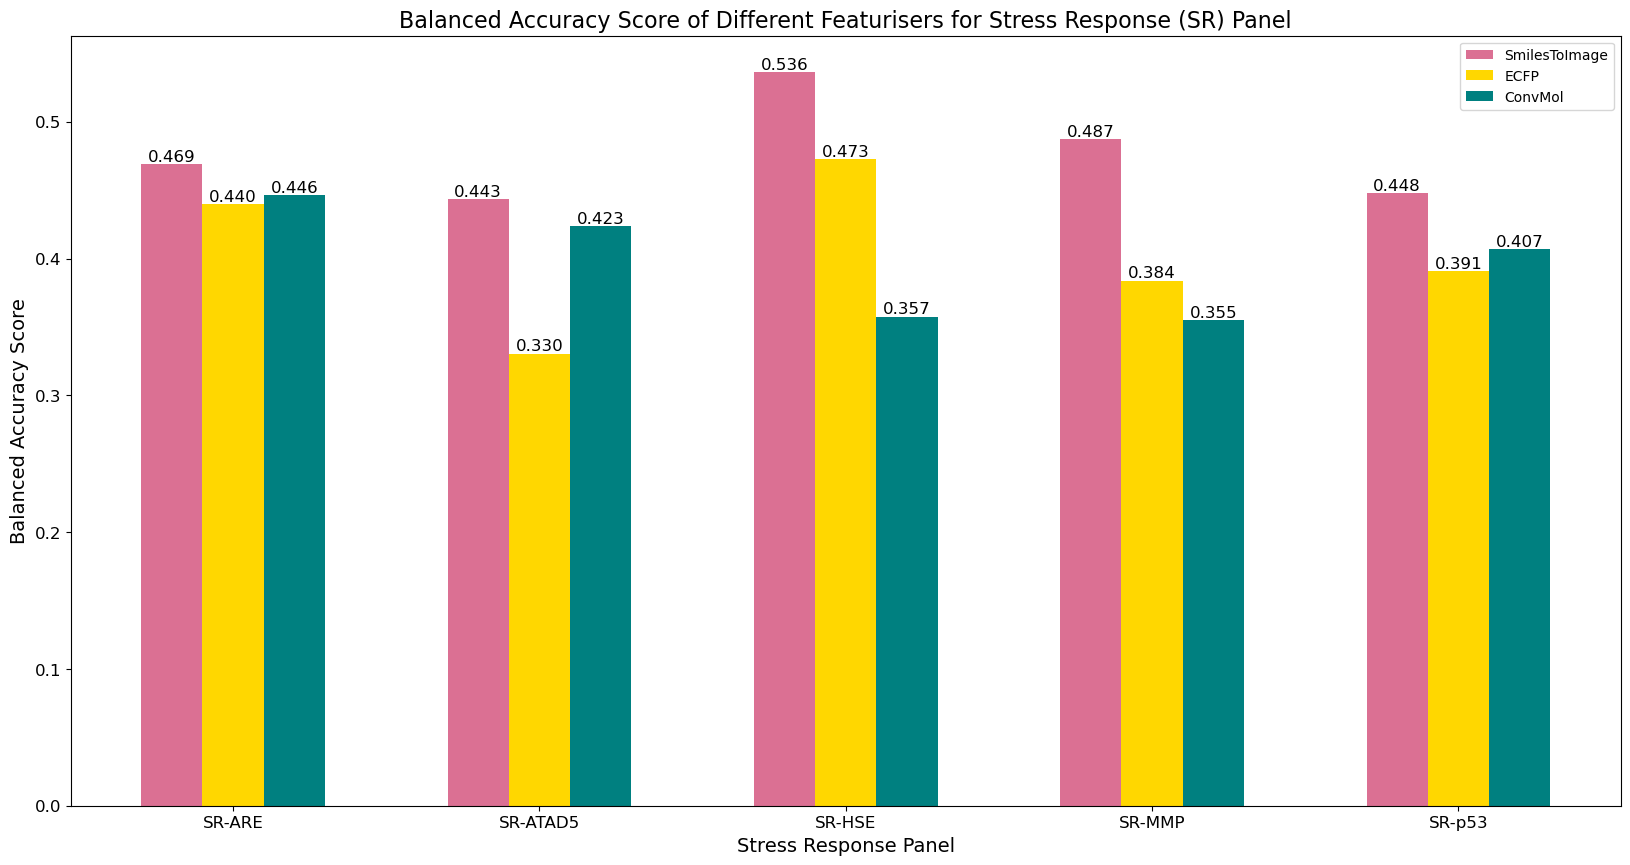

In [58]:
#Grouped bar plot
fig,ax = plt.subplots(figsize=(20,10))

width = 0.2

x=np.arange(5)

plt.bar(x-0.2, smiles2img_balanced_acc[7:12], width, label='SmilesToImage', color='palevioletred')
plt.bar(x, ecfp_balanced_acc[7:12], width, label='ECFP', color='gold')
plt.bar(x+0.2, convmol_balanced_acc[7:12], width, label='ConvMol', color='teal')

plt.title('Balanced Accuracy Score of Different Featurisers for Stress Response (SR) Panel', fontsize=16)
plt.ylabel('Balanced Accuracy Score', fontsize=14)
plt.xlabel('Stress Response Panel', fontsize=14)
plt.bar_label(ax.containers[0], fmt='%.3f', fontsize=12)
plt.bar_label(ax.containers[1], fmt='%.3f', fontsize=12)
plt.bar_label(ax.containers[2], fmt='%.3f', fontsize=12)
plt.xticks(x, assays[7:12],fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.savefig('Overall BA-SR.png')